In [1]:
using Plots, LaTeXStrings, SpecialFunctions, Random,Distributions, Interpolations, Dierckx, NLopt, ForwardDiff
using LinearAlgebra,StatsBase
gr(); #Load packages

In [2]:
function Stochastic(LX,LY,t1,A0,PM) #Stochastic model
T=Int(t1)
Q=Int(sum(A0));
pos = [(0, 0) for _ in 1:Q]
pos0 = [(0, 0) for _ in 1:Q]

NumAgent= zeros(LX)    
    
count = 0
for i in 1:LX
    for j in 1:LY
        if A0[i,j] > 0
        count += 1
        pos0[count] = (i,j)
        pos[count]=(i,j)
        end
    end
end

    
for kk in 1:T
Q = length(pos)
count = 0

    while count < Q
        # Choose a random particle to move
        idx = rand(1:Q)
        count = count + 1
        xx, yy = pos[idx]

        # Choose a direction: 1=up, 2=down, 3=left, 4=right
        dir = rand(1:4)
        R=rand(1)
        if dir == 1 && yy < LY && yy >  1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy < LY && yy >  1 &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy < LY && yy >  1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy < LY && yy >  1 &&  R[1] <= PM
            xx += 1
        end

        
        if dir == 1 && yy == LY  &&  R[1] <= PM
            yy += 0
        elseif dir == 2 && yy == LY  &&  R[1] <= PM
            yy -= 1
        elseif dir == 3  && yy == LY  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy == LY  &&  R[1] <= PM 
            xx += 1
        end

        if dir == 1 && yy == 1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2  && yy == 1 &&  R[1] <= PM
            yy -= 0
        elseif dir == 3  && yy == 1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4  && yy == 1 &&  R[1] <= PM
            xx += 1
        end
            
        
        pos[idx] = (xx, yy)

    end


end




for i in 1:Q
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1    
end

return NumAgent,pos0,pos
end

Stochastic (generic function with 1 method)

In [3]:
LX=200 #Stochastic simulation problem definitions
LY=50
PM=1.0
D=PM/4
T=100.0
U0=0.5
h=25 

A0=zeros(LX,LY)
xxloc=zeros(LX)
yyloc=zeros(LY)
for i in 1:LX
    xxloc[i]=-LX/2+(i-1)
    for j in 1:LY
    R=rand()
    yyloc[j]=0+(j-1)
        if abs(xxloc[i]) <= h && R <= U0
        A0[i,j]=1.0
        end
    end
end
Q=Int(sum(A0));

In [7]:
@time (data,pos0,pos)=Stochastic(LX,LY,T,A0,PM); #Calls the stochastic model, data below is the output used for reproducibility
data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 6.0, 1.0, 6.0, 7.0, 5.0, 8.0, 10.0, 4.0, 7.0, 19.0, 11.0, 11.0, 10.0, 19.0, 
    28.0, 19.0, 19.0, 13.0, 23.0, 32.0, 26.0, 23.0, 14.0, 23.0, 15.0, 21.0, 34.0, 19.0, 23.0, 34.0, 28.0, 28.0, 22.0, 23.0, 23.0, 39.0, 19.0, 
    35.0, 25.0, 35.0, 23.0, 20.0, 22.0, 23.0, 20.0, 25.0, 22.0, 24.0, 23.0, 17.0, 26.0, 23.0, 20.0, 27.0, 21.0, 22.0, 26.0, 21.0, 14.0, 12.0,
    7.0, 15.0, 7.0, 11.0, 8.0, 9.0, 2.0, 7.0, 6.0, 4.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];

  0.015244 seconds (127.91 k allocations: 7.847 MiB)


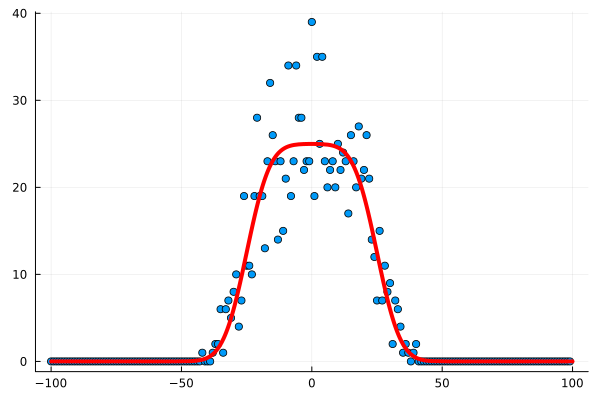

In [8]:
ue(x) = LY*U0*(erf((h-x)/sqrt(4*D*T))+erf((h+x)/sqrt(4*D*T)))/2
p1 = scatter(xxloc,data,label=false)
p1 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false) #Create simple plot to compare stochastic simulation data and PDE solution

In [9]:
NumAgent0=zeros(length(xxloc))
NumAgent=zeros(length(xxloc))
for i in 1:Q
NumAgent0[pos0[i][1]] = NumAgent0[pos0[i][1]] + 1
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1
end

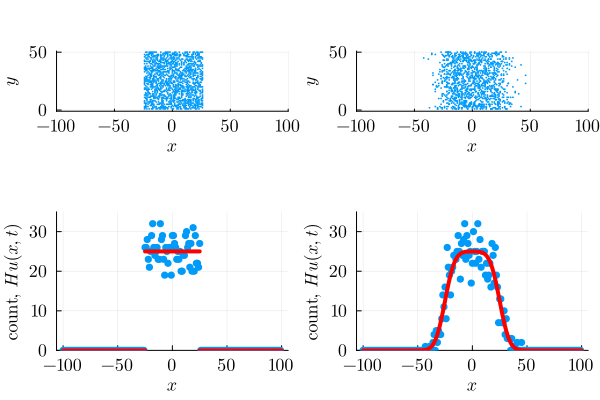

In [10]:
p1 = scatter(pos0[1:end],ms=1,msc=:auto)
p1 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p1=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p1=plot!(yticks=([0, 50],[L"0",L"50"]))
p1=plot!(xlabel=L"x",ylabel=L"y")
#display(p1)

p2 = scatter(pos[1:end],ms=1,msc=:auto)
p2 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p2=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p2=plot!(yticks=([0, 50],[L"0",L"50"]))
p2=plot!(xlabel=L"x",ylabel=L"y")
#display(p2)

p3 = scatter(xxloc,NumAgent0,label=false,msc=:auto,ylims=(0, 35))
f(x)=LY*U0;
g(x)=0.0;
p3=plot!(f,-h,h,lw=4,lc=:red,label=false)
p3=plot!(g,-LX/2,-h,lw=4,lc=:red,label=false)
p3=plot!(g,h,LX/2,lw=4,lc=:red,label=false)
p3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p3=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p3=plot!(yticks=([0, 10, 20, 30],[L"0", L"10", L"20", L"30"]))
p3=plot!(xlabel=L"x",ylabel=L"\textrm{count}, \, H u(x,t)")


p4 = scatter(xxloc,NumAgent,label=false,msc=:auto,ylims=(0, 35))
p4 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false)
p4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p4=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p4=plot!(yticks=([0, 10, 20, 30],[L"0", L"10", L"20", L"30"]))
p4=plot!(xlabel=L"x",ylabel=L"\textrm{count}, \, H u(x,t)")

p5=plot(p1,p2,p3,p4,layout=(2,2))
#savefig(p5,"Figure1.pdf")
display(p5) #This creates Figure 1(c)-(f)

In [11]:
M = 100000 #Samples for ABC rejection with the stochastic model

Umin, Umax = 0.30, 0.70
Dmin, Dmax = 0.05, 0.40
Usampled = rand(Uniform(Umin, Umax), M)
Dsampled = rand(Uniform(Dmin, Dmax), M)
dis = zeros(M)

for m in 1:M
A0=zeros(LX,LY)
for i in 75:125
    for j in 1:LY
        if rand() <= Usampled[m]
        A0[i,j]=1.0
        end
    end
end

(datasample,pos0,pos)=Stochastic(LX,LY,T,A0,Dsampled[m]*4);
    dis[m] = norm(datasample - data)
    if mod(m, 10000) == 0
    println("sample: ", m)
    end
end

sample: 5000
sample: 10000
sample: 15000
sample: 20000
sample: 25000
sample: 30000
sample: 35000
sample: 40000
sample: 45000
sample: 50000
sample: 55000
sample: 60000
sample: 65000
sample: 70000
sample: 75000
sample: 80000
sample: 85000
sample: 90000
sample: 95000
sample: 100000


In [11]:
#idxs = partialsortperm(dis, 1:1000); # Indices of the 1000 smallest elements
#dataD = Dsampled[idxs];
#dataU = Usampled[idxs];
dataU = [0.5257003384142978, 0.4864447397313608, 0.49348133631644064, 0.4934302765128365, 0.4553099850688506, 0.4967133318958164, 0.4685459934786663, 0.571180338980671, 0.4835416574551792, 0.46783426932660677, 0.47345328262815684, 0.4893068751033839, 0.5099199220988709, 0.46970691306140155, 0.4806091953642546, 0.525585297746741, 0.5005118868663787, 0.5105727850613245, 0.5030833817395027, 0.5081907938962791, 0.5173660156016207, 0.45954524502894134, 0.4550387613605591, 0.5469779412432529, 0.4725196941330341, 0.4681599439569324, 0.49685887453076494, 0.45468431573513834, 0.5105728208759522, 0.4823009234479647, 0.5338542900612506, 0.49861864163871616, 0.48038775593574995, 0.4777214641878875, 0.4701670055436922, 0.4872606113210669, 0.5053112548974137, 0.4734937991737428, 0.521541119509863, 0.4722658693589122, 0.5091146763715357, 0.5203507950866242, 0.4730579337133665, 0.49691369560595444, 0.495920810458907, 0.46531165973621236, 0.4969781979474994, 0.48498079373775205, 0.48278093888343127, 0.5249379556707996, 0.4988419706846332, 0.4656221215810353, 0.47735078665469255, 0.4814428197759816, 0.5193169083258629, 0.44771523990615897, 0.4948907730972937, 0.4997621788507728, 0.47298407174842405, 0.4806919838120949, 0.5402767507669428, 0.5150563700404795, 0.5128169328743494, 0.46881167077647035, 0.4418866346361806, 0.4492958569970348, 0.5032084805434035, 0.4995506268073554, 0.522920889954568, 0.44747153966199216, 0.46208154214539227, 0.5084346317208163, 0.487349263852801, 0.4810877943383294, 0.4944156559767702, 0.5198738284530771, 0.5100597957202371, 0.49197392786772876, 0.45147852091915197, 0.4852029847635802, 0.49089648165162536, 0.45993172989846226, 0.4885193406757625, 0.44818955003505345, 0.48276215247695153, 0.4694998665237803, 0.4812409064532204, 0.5047308612395501, 0.4804628675443024, 0.49138406959775016, 0.46368642886762756, 0.5446802671592731, 0.48041673269678564, 0.5232568920765159, 0.4847811539255614, 0.508105812284813, 0.516540042533745, 0.49703461045639585, 0.48601274083504264, 0.47726813123784884, 0.4575196915252139, 0.48748830282795885, 0.4609819178968829, 0.4788143989777235, 0.4846449263672586, 0.5147932373085815, 0.4998890460055627, 0.44817776807394716, 0.48733752231458327, 0.5078280818832396, 0.5412740058302709, 0.5009599618627911, 0.5393517392496558, 0.4434141624360952, 0.4685429397387323, 0.4524548438319611, 0.46050069029601204, 0.46884847987423184, 0.48803552950881396, 0.4632021552166363, 0.5119991908624609, 0.5059811835419041, 0.5413608391274761, 0.515934221306252, 0.5133610064588736, 0.46614819216465303, 0.5007142918108298, 0.5024726839968056, 0.48782376562068985, 0.5083943687589711, 0.49060545343490536, 0.46206876038157474, 0.5525952733321716, 0.49706245973374164, 0.5133221766414161, 0.5316774964043709, 0.5003311070808625, 0.4758794441612342, 0.46040140762128495, 0.46475544976609845, 0.47732892915165537, 0.48338348851120616, 0.5461898070762559, 0.43276052727784753, 0.5270252790450318, 0.4880262777924629, 0.4912405408638042, 0.46192891936850566, 0.5007085882451788, 0.4587380169314541, 0.4958158112859657, 0.4856890329956083, 0.4340101070011118, 0.46209087977583263, 0.4956411236044608, 0.5031170216707079, 0.5118668304479281, 0.5322654786271056, 0.4962313865261483, 0.5134414625859314, 0.5005044862634439, 0.4958756659070992, 0.47286690726019975, 0.5359401537372889, 0.4859154141872505, 0.4859314104186959, 0.45864479954637477, 0.48033568420240125, 0.48182997128698646, 0.4849963494655154, 0.49275204023696906, 0.515515824825033, 0.47230059737168695, 0.5048352035775417, 0.4681054459425892, 0.4883929721884541, 0.48986513749915916, 0.4989495948797523, 0.4723414326282488, 0.4945200245187045, 0.4942529719149374, 0.5016915503587903, 0.4827822865606764, 0.4884106728291183, 0.49399954647279365, 0.4565634784965405, 0.4200270215113333, 0.4897576434679338, 0.4579770906412373, 0.4629216936391578, 0.4554626650252871, 0.4778417467710051, 0.5183787177818242, 0.4878962337359427, 0.5138507356996012, 0.5061335699947014, 0.46740226544907915, 0.4611997117079385, 0.45055044464204175, 0.47131502866872366, 0.517706488741147, 0.46844342830753294, 0.5538322724395293, 0.48720172555558916, 0.4129158331982541, 0.4900109443341002, 0.48796951340375194, 0.4990915989380106, 0.4455106266276923, 0.48911411910736313, 0.5658748767857383, 0.4532453226393606, 0.4899304948419967, 0.5098921541607532, 0.4830486973816447, 0.5088073086806897, 0.4961954895900237, 0.5027821381369209, 0.43612608341008485, 0.4689320502100638, 0.5039672491594267, 0.5410033742368111, 0.4875103518459304, 0.5064041059803432, 0.4741448639495752, 0.47956026182618394, 0.4651765088695341, 0.5081007936284285, 0.4745164193297956, 0.5135873070979313, 0.489724874342206, 0.48404303569701557, 0.4496014696465737, 0.443500158778855, 0.4638277780773635, 0.4701051185789192, 0.5302379977747228, 0.47093248957339784, 0.57742903413241, 0.5263425525660543, 0.4539205384396698, 0.4980936332349982, 0.45658922433094495, 0.5013596227262211, 0.5205232547461767, 0.532993643966945, 0.49373001963712704, 0.47715329996505873, 0.4904035185865252, 0.487271880511911, 0.48871661977354336, 0.511759513632917, 0.49584203395476245, 0.45385723598216776, 0.49035008630000393, 0.4542613200606549, 0.42368590096822456, 0.48327996662957734, 0.48822873494918206, 0.5169585437373803, 0.4812055979546259, 0.4678661605147568, 0.5044514292516895, 0.46772737453895274, 0.4706641827492535, 0.5091775430699824, 0.5015187030229485, 0.5118676552206749, 0.4591036572485644, 0.4626314493843743, 0.4683135259125376, 0.49394632977991904, 0.5370738896771351, 0.4947453076467143, 0.4897357833731642, 0.4561554308448581, 0.5299331873805727, 0.4763252158620156, 0.5232193434052156, 0.443242272898742, 0.4938690256042524, 0.4787176362987905, 0.49837036235699983, 0.511589961205261, 0.5023930870420842, 0.4468025155410924, 0.5063023649795083, 0.4983812513896556, 0.4887727960160842, 0.47778273717523045, 0.44387682111292265, 0.44783256723737264, 0.4520994518306192, 0.48963673220978987, 0.4984334592998011, 0.510927525944135, 0.47414120268368265, 0.504168023324588, 0.4454942665792314, 0.5117859717836831, 0.486242984580433, 0.45924345623852586, 0.4849341900477669, 0.48880479498554347, 0.47153849212808974, 0.47594374186994215, 0.5103435711281785, 0.5006923731665307, 0.5340959791726725, 0.4839726020813172, 0.5097688818404381, 0.5120459174798145, 0.4779647296548998, 0.47122970604445924, 0.49790044965658287, 0.5453550159741951, 0.4673796711731608, 0.5096487766356042, 0.5136240358303238, 0.4390805029398095, 0.49434533518300516, 0.48177911754027974, 0.5367591405123135, 0.49484888175343367, 0.47023441523899423, 0.5169296535933203, 0.4698660018254971, 0.4886383478151275, 0.5063586900495536, 0.5372248964308375, 0.46151783666357216, 0.4676818874650259, 0.4740188182904531, 0.46788955391883, 0.43788752759880484, 0.4719585100594469, 0.4782091680589438, 0.4456839104013035, 0.5017707557057289, 0.5220812079010055, 0.5076948181399221, 0.43925733838757586, 0.4740250539068241, 0.45761320817020357, 0.5354118641209289, 0.5288241614547211, 0.537478834299495, 0.4996311753341843, 0.5145081044876632, 0.5140255835987345, 0.5188693582242245, 0.4891401122370691, 0.504767353717248, 0.4596258020230648, 0.5381760380196452, 0.4537800308029053, 0.5365515603090254, 0.4715158640011348, 0.46516824354463515, 0.4539140234879577, 0.5014895522056426, 0.5573453438246899, 0.5112260546349785, 0.5226010969877309, 0.4624596231341079, 0.4702237663490757, 0.4861839303425465, 0.5118683040205237, 0.49674379395794843, 0.5075515884043187, 0.5373730587388297, 0.46048661995840034, 0.4932330201074048, 0.5026905425911978, 0.5123242672780449, 0.4501822525368954, 0.5098453647871898, 0.45011566143812237, 0.5211942929327216, 0.49436682818865885, 0.49044236171657185, 0.42262390954369905, 0.4418301262009238, 0.5371276850907226, 0.5250333143603092, 0.4893821227043934, 0.4708259606640065, 0.4588082617799951, 0.49126819740903716, 0.49765292202027417, 0.45827962691803964, 0.4751693538649042, 0.5037402785902647, 0.46094480722921205, 0.4900725104063781, 0.5082613795883817, 0.4888833127272341, 0.4914664634815902, 0.49872867628321443, 0.4985847659418531, 0.44946961117594697, 0.505938060953089, 0.4799689760789259, 0.5003519567951578, 0.4208961954217331, 0.4875379127977557, 0.4889455275166177, 0.4602543336348211, 0.4782850542331412, 0.4959387942134016, 0.4417762392540722, 0.527496179188121, 0.4922192608884822, 0.5590410921034982, 0.501264965645673, 0.44505619622316317, 0.49060534714457354, 0.49743854886367284, 0.48897663489133847, 0.46569341077986004, 0.4921847052221706, 0.5451172842650955, 0.4969291685593462, 0.46724803411161697, 0.4775865478322331, 0.4770327017737087, 0.49350214279424265, 0.48065678794206457, 0.462241714886684, 0.4863210884897916, 0.4899083290487032, 0.48736071231620454, 0.45600254810986807, 0.5285565018949233, 0.45495083758240723, 0.44502799531435583, 0.44244101412254444, 0.47556649860233235, 0.4924715453298406, 0.466616250457372, 0.483345675174087, 0.46825633196109906, 0.5078767094752227, 0.4302115916317378, 0.5216054329830199, 0.5155495697768534, 0.5210575134091509, 0.5191371559119986, 0.4827835176632276, 0.5568200347529969, 0.5020556986044415, 0.4731896792712432, 0.4796319571807852, 0.45757524144039874, 0.4961546731037061, 0.5028232416919839, 0.49979513041295454, 0.4550828563501464, 0.45475352450790046, 0.4561820816607139, 0.48402977267959246, 0.47284279962072695, 0.572773916092921, 0.4872743365098915, 0.4722654577185437, 0.4755206002114061, 0.5102637367163635, 0.533795501669637, 0.4410605240062637, 0.4410834473591234, 0.4800004403746847, 0.4899684987473347, 0.4974937023198027, 0.4631586024868446, 0.4834361131364643, 0.5012555931221528, 0.4528436899086395, 0.47703278918642417, 0.4795115583650527, 0.47775502379207335, 0.5233847300320564, 0.49433496097624086, 0.4691400272919731, 0.5253265003213208, 0.4592331339714745, 0.4440493854809634, 0.46897297587230513, 0.47735657662950254, 0.49110121430412323, 0.5059151883899022, 0.5004019833304374, 0.4586868898250189, 0.5068782600360567, 0.4522459415085887, 0.49967236491221967, 0.514086598458523, 0.46779127315091407, 0.44819413052181667, 0.48533928625123834, 0.44952553367151177, 0.48700368331211363, 0.4730682348648727, 0.47931365394993664, 0.47726546678074677, 0.48760569091984207, 0.5266195014759261, 0.5102601105641268, 0.5041713694464148, 0.46708918423260626, 0.4724594236069689, 0.4927106704814139, 0.5587062098958598, 0.5243932432972629, 0.5134735077927864, 0.5022113117824063, 0.46453791228335767, 0.48709957151630895, 0.487616370138351, 0.5002103724790989, 0.4806639271461136, 0.48834628635630606, 0.5052997463106981, 0.4899563757127974, 0.5104246040082989, 0.46975525468290413, 0.46280927528969207, 0.48580137651454536, 0.4876890706582423, 0.48608447707951186, 0.49835932706273944, 0.4691685857129785, 0.47720290812865296, 0.5273298944394493, 0.4824723573773565, 0.45605889422108986, 0.4885958258878693, 0.4810180547011167, 0.5237242466767206, 0.48514500406064753, 0.5270132233935875, 0.4968479818389666, 0.4929239293601103, 0.4732311126806954, 0.48941000553965464, 0.4662260624668927, 0.5099028287497276, 0.5169703960531673, 0.4796659942965761, 0.5270515091846228, 0.48097133542266834, 0.4804723894971233, 0.49148155158036433, 0.48316853172984825, 0.4827202540843101, 0.48097443487228647, 0.5015828991162716, 0.5386655931252076, 0.5274286170957639, 0.4781857362480811, 0.4580334020894609, 0.5161854647485559, 0.4807432762980611, 0.5103655659974424, 0.4660983755234003, 0.44493243167587615, 0.48405236869142565, 0.5201084029591554, 0.513245837831286, 0.4573562745985866, 0.5091347809473232, 0.495425287484232, 0.48417473562955676, 0.4897128552455903, 0.4516649437997504, 0.5305427276614676, 0.47989706356592327, 0.5617414909787863, 0.4401475435509979, 0.47242052945278457, 0.44469393313022587, 0.5491987712452059, 0.47948723276288896, 0.4740033852850708, 0.4681865459097241, 0.5019760622109115, 0.5246933669341797, 0.517818922643047, 0.4616464146229138, 0.502393639357069, 0.4819528515304511, 0.5082748443462058, 0.4805350101078456, 0.4684409961820567, 0.49150756965642395, 0.5032793675211544, 0.5088029952530445, 0.4213846480459377, 0.518041370062942, 0.5054727933032104, 0.49175006831558343, 0.47844489770611376, 0.5237114200985509, 0.4993558863193861, 0.48163135366028287, 0.48917805686893284, 0.43977834818858613, 0.5100288000047973, 0.507231763393348, 0.5107761290646625, 0.5328804557083155, 0.4954718912496534, 0.45676207635519117, 0.44426443363536305, 0.4645811379519195, 0.5245749618972955, 0.5190905109056535, 0.4737894660508388, 0.5216370645315593, 0.5155512021898618, 0.47303429066273506, 0.5361658971106839, 0.49000988087719677, 0.5016285003380441, 0.5124983824461773, 0.49472616988540064, 0.5332994303568088, 0.5509428971660638, 0.5209946929402405, 0.5205441048008648, 0.4625568381317817, 0.5705365949067391, 0.5476014424254985, 0.5011660360664372, 0.4826527296594253, 0.4832905498892843, 0.520761285069882, 0.49797608603143306, 0.5426768956264766, 0.5021811237536901, 0.471212714704191, 0.4620657163461779, 0.5196102066861732, 0.5602876775501628, 0.5082837121206889, 0.47610190807510233, 0.5254020597396889, 0.45645561304883464, 0.48607517416923973, 0.535823520990157, 0.5398690360296512, 0.5195773643219747, 0.49462584246862307, 0.4935490376529135, 0.4626984484252942, 0.49549213144082455, 0.41943613402832713, 0.5093099909806567, 0.4646696191671249, 0.46903365131807406, 0.4657846126041235, 0.45835999367912855, 0.5020768553692471, 0.49468073588977984, 0.4674730904966795, 0.4406643969529144, 0.46204448541087295, 0.5017654026074889, 0.4825941427752083, 0.5454049847452681, 0.5000285832927651, 0.46829144409293655, 0.5005490961719323, 0.5269545859195475, 0.4912257676487966, 0.4799241482013546, 0.4534877145687879, 0.49838401341107064, 0.50223083561855, 0.5417032283381755, 0.4528354125897277, 0.45160924741295433, 0.46812928135924814, 0.4601745104981566, 0.48743867505974925, 0.4955471434003893, 0.49501211497211484, 0.4773411592404966, 0.4990900387311557, 0.477363632963852, 0.48386960982312865, 0.43320890740559137, 0.43914867183659273, 0.5062571402119136, 0.46747023824859296, 0.48540488415780403, 0.4765022109660825, 0.47883952215280234, 0.5197993282119006, 0.5222258019850656, 0.4993056217175067, 0.4902546288694507, 0.4922714681137532, 0.49950573803122256, 0.5009396735004541, 0.4388867520009143, 0.4822414305738197, 0.5270271796571573, 0.5017141931940706, 0.4350083394899629, 0.4680653621921856, 0.4556545729198178, 0.4691666422388141, 0.4809748330083543, 0.501106496964105, 0.4918290248742495, 0.5088933661667507, 0.47009919508664866, 0.4592421125521791, 0.49120526475538306, 0.4755385637278783, 0.49330951522793615, 0.4641047375059152, 0.5207443297928658, 0.5401521090990125, 0.4779064247003697, 0.4705879480624615, 0.4730009555603292, 0.472720857002499, 0.4739344907949179, 0.45359678094038663, 0.5307339165254711, 0.46283327261943735, 0.502649470375285, 0.524433609483733, 0.4491409112570841, 0.47817490386306905, 0.5427692928033621, 0.5124465840640047, 0.47455917596423297, 0.49428569838267966, 0.5358953812487754, 0.44278290332737735, 0.4847889268982756, 0.48303195918403163, 0.4928464469132111, 0.4868450267636565, 0.4678814030484955, 0.5019473199598512, 0.4847951955539336, 0.5487679060018149, 0.44450943364314527, 0.47178353817370733, 0.4555989907612034, 0.5034216839030751, 0.5848522030058414, 0.5132277962615577, 0.4966660884285295, 0.5438425421177556, 0.4683551673415341, 0.5117995513831523, 0.5036797110544216, 0.4580679223122282, 0.47620626963575385, 0.4511743162292495, 0.5065849153655047, 0.4679051859763689, 0.4403190535756435, 0.5080347580454714, 0.5132780906271518, 0.5112729704252865, 0.4783935307486237, 0.5032631244850246, 0.5063296504713557, 0.4999692258048323, 0.5395014790991653, 0.485310659487829, 0.5146780209887133, 0.4556517925226672, 0.4886694345375364, 0.45432055154536427, 0.4610275957874779, 0.4799060224156676, 0.5020273398555305, 0.4967158856436992, 0.47604094372279526, 0.462851522603945, 0.46246462783648135, 0.4704106725366306, 0.5129255421098805, 0.5084223734373193, 0.4538116080111443, 0.48713720062827126, 0.5028191899316615, 0.47434370318516283, 0.5087285016210986, 0.5055269974155245, 0.5219005661452647, 0.48173256553349214, 0.45228708309909765, 0.46857725949255424, 0.45529476509839517, 0.4532862813319921, 0.47349802136237307, 0.5380081024033958, 0.5077299512935733, 0.44804190849142783, 0.4598855051503374, 0.5319990877026097, 0.4696618921027269, 0.47565497558401654, 0.5291835442548207, 0.4670384576398392, 0.4917863351548991, 0.4879307879716147, 0.44571929730546916, 0.43995597325270264, 0.44685699103085763, 0.4439844653801537, 0.48038817039442383, 0.5325545162053609, 0.4627166873534812, 0.4571672677280665, 0.5363086331841915, 0.44760060273107133, 0.4529352092815151, 0.5153607736660869, 0.554473603706608, 0.5219437274198345, 0.5330748844944214, 0.48121269557516644, 0.482173211559203, 0.493527197124092, 0.5070051933260148, 0.5195061997315851, 0.45387713348029585, 0.4476867800371919, 0.43853501441112397, 0.5214518262957082, 0.5091958193170996, 0.48601075073587596, 0.45637003540471993, 0.47015322821026595, 0.48693089281157265, 0.5060173976757689, 0.449917459559947, 0.4572620937666374, 0.5241251958982307, 0.49716636995995367, 0.4881046003230628, 0.49298739639543865, 0.4425646361612614, 0.5272403557947578, 0.5495964776656634, 0.4948732649917582, 0.4900366475861643, 0.5312603474891308, 0.4766880925278779, 0.49749028121481326, 0.454062826073831, 0.45674471863817206, 0.44002540729245226, 0.4842990882246052, 0.4991366760604133, 0.5443294266179775, 0.44826125593151345, 0.5330710530180753, 0.5253127699549796, 0.4874291895418572, 0.45367821147688076, 0.49193343329403316, 0.5044462391542293, 0.5324567010005666, 0.4628654265910006, 0.45773200339997877, 0.5089962898521564, 0.5265980273349132, 0.461075870923711, 0.5019664391429789, 0.4758552475628131, 0.46496655094646866, 0.4952112098492292, 0.4901227775384768, 0.4819368078998757, 0.4713997701028485, 0.533251207120121, 0.4703934770645193, 0.5483195283551103, 0.4673658542859954, 0.4772626400751192, 0.4653203492374383, 0.5031354090193534, 0.48646519076363176, 0.5304905854404766, 0.46654681805977355, 0.500709952993185, 0.4706743125798203, 0.47212074065752696, 0.4460582467006202, 0.45399444501621866, 0.5256729581466305, 0.5187823091731691, 0.5454184207727721, 0.5091052288611068, 0.5285428990080554, 0.49694175795490503, 0.4788787132515179, 0.47913112866096746, 0.4851150796025485, 0.4867239572612807, 0.4992511690929432, 0.5217287999333768, 0.440221626218446, 0.47839084967237544, 0.49953479771132764, 0.4911931752045342, 0.5469114192168649, 0.44873634340212615, 0.5037371282346859, 0.4663174064334632, 0.5723007020987595, 0.5020100689755334, 0.45503268531220065, 0.502583019521338, 0.4862955702430569, 0.5294585577649411, 0.441264127091201, 0.46903048761563115, 0.5496714816800541, 0.5073847402295768, 0.4684605684772932, 0.5085437799728939, 0.48081025457810617, 0.5000341907943031, 0.49630679580435566, 0.42599080127640404, 0.49364008255806435, 0.49011620671901557, 0.48550421938214916, 0.4908212488311594, 0.4980817498168252, 0.5201507369892484, 0.5104398223460358, 0.4957878776917287, 0.4866271049406454, 0.44228068175777985, 0.44610295098840913, 0.47062050296521624, 0.4592125294274543, 0.5078084798964893, 0.484960008709174, 0.5092417924355285, 0.5079697799308979, 0.48301076419249334, 0.48621008664973664, 0.4586942031944532, 0.5022331703276436, 0.550927039212409, 0.49222037138918484, 0.5232222567817075, 0.506304842560465, 0.46156599584664937, 0.5562547982934041, 0.4970690894430998, 0.43781048853179066, 0.5338892355530676, 0.5375931713666918, 0.4324053341114, 0.4569775896948842, 0.4696522327460657, 0.47828752180391243, 0.4871048627579817, 0.5295161921435129, 0.4508407824722003, 0.5040872882456775, 0.4614958311751617, 0.49062932575029483, 0.46043481333183794, 0.4496421453605508, 0.4790437875072292, 0.5005736001890396, 0.4423475830878682, 0.49553887385771755, 0.45831888924486136, 0.47638704035106616, 0.5437790665830509, 0.4616635466855816, 0.5507394922561382, 0.41492582969810854, 0.46449395648434183, 0.4770989261686294, 0.46275898498256185, 0.4642237867956087, 0.43162198512918054, 0.5699772249577229, 0.5286737309328953, 0.5286674573228823, 0.5080823022662871, 0.46365441773916, 0.5133187442012126, 0.4905999683493608];
dataD = [0.24801111836282191, 0.1769902298762407, 0.21843614512022635, 0.3083916807457625, 0.31007705435244043, 0.2738612492276273, 0.34424208224175074, 0.3843403801393223, 0.2585758511605262, 0.38916290429105216, 0.17120054632987308, 0.21376405575578167, 0.2237871874738096, 0.24208100232571378, 0.37725736016840516, 0.24709552392694645, 0.3733344741835581, 0.33147661184837385, 0.32037814019880145, 0.15797697877071737, 0.31709133955158236, 0.2529895446440579, 0.37454539840702133, 0.179403575788884, 0.27120080170382077, 0.15552830406567125, 0.15738817364969682, 0.32588657980753155, 0.3968956008587991, 0.29827334276671785, 0.19762247770192043, 0.3893152403214691, 0.37772497414511824, 0.24188227373489546, 0.23571570342801978, 0.32317035433995406, 0.15290068418456976, 0.3262376050206062, 0.2290633996960194, 0.18287932959653735, 0.295050112144858, 0.16887506717904524, 0.3404038084877585, 0.20566433633742875, 0.38679913906014185, 0.26945084490654264, 0.2271701818379791, 0.30721575846063087, 0.3939841022596292, 0.1952348909827139, 0.2638313812971254, 0.2825620945845018, 0.3172772533838617, 0.24620507556532994, 0.35574173205377363, 0.2054257765915946, 0.25626137750978006, 0.38944801753623115, 0.10877161697157073, 0.28327126847872786, 0.23142348726297024, 0.10651973313932052, 0.35484231781498426, 0.31807026623638, 0.22040361848038675, 0.29971052033753665, 0.13256274004896917, 0.26045727540176444, 0.3287551341971168, 0.33184570966854005, 0.15265565521015528, 0.2727632277062668, 0.19894503925737483, 0.12028008783598539, 0.39213738601107495, 0.1681397000702206, 0.17041228543972664, 0.3914721814725349, 0.21990286927348662, 0.10791928706615675, 0.17684873025682263, 0.35519681397396347, 0.21171760516252558, 0.22618507987126124, 0.25880979012170263, 0.13796305463991007, 0.24230003611251655, 0.25778998301239364, 0.27956686827044686, 0.3786446451490121, 0.28303327621366153, 0.3190394752065992, 0.23351891459260882, 0.3003898649382853, 0.18745074108249182, 0.32438832437677084, 0.22436904783948186, 0.22567941780909867, 0.23641482770591438, 0.3042873364118211, 0.3325789539271321, 0.12223953977900091, 0.3915425739051607, 0.1740447104273073, 0.39656846401056517, 0.21934346908042024, 0.16427465901280347, 0.39816358146274866, 0.2536696429162381, 0.3901454750135409, 0.2462834904033931, 0.18707152590727621, 0.18346805211850947, 0.11869606210942574, 0.23766863039493702, 0.1987830456483421, 0.23783988360586705, 0.11886174330101038, 0.16066596221320556, 0.2562123306798422, 0.3393361040376178, 0.28178824427353905, 0.22068324937931721, 0.2562616889716132, 0.25765897913399755, 0.11383415801898489, 0.35475256056585164, 0.21634238878012368, 0.22266115298712358, 0.3975512755764578, 0.2188633117509139, 0.250304393814286, 0.30815753272454477, 0.3034558533387121, 0.3353619819892209, 0.25485220065957703, 0.36051220416126395, 0.3121171126211499, 0.1649547451454953, 0.35074336791397576, 0.19705836239289803, 0.1469073211819767, 0.14883628211545577, 0.3182682719479987, 0.31791229031455676, 0.3542858102600251, 0.18958192507474708, 0.28793511221264856, 0.3249079445905606, 0.3575772352597711, 0.28235991066747745, 0.1059399019625552, 0.07304193593798342, 0.22681213975833858, 0.2866432463036513, 0.18979104664458057, 0.28971428943756766, 0.3207272275049557, 0.2142296930516841, 0.16344146782190913, 0.1322327120997614, 0.11167212130759283, 0.36844201236859464, 0.21307025829851173, 0.2279788532280973, 0.09225898111508016, 0.17549564141769963, 0.2521753888299293, 0.32229559656092344, 0.3301427645560027, 0.25703013250471607, 0.2339339887290222, 0.3396059839159626, 0.12940620271839487, 0.17720072308399187, 0.22766256410009533, 0.1394201653813864, 0.2995967794875308, 0.17476376771427204, 0.235678399410941, 0.3249629662930146, 0.27377645245145404, 0.1563529769860769, 0.2618372676600085, 0.3295447281485757, 0.39394920955951274, 0.25663970027418115, 0.15874408569935483, 0.38479698830204445, 0.20326411013789153, 0.09836735331349813, 0.13566053905953898, 0.20908957349529267, 0.2465496971039905, 0.2955901178063098, 0.3490958265848071, 0.05543992477813578, 0.31761050514048134, 0.23988689133577357, 0.29226478024529795, 0.17019780729105138, 0.31861040945514196, 0.3969338748896208, 0.2578638965472678, 0.23502007842130807, 0.08337504659418353, 0.327714447424202, 0.15740492183367005, 0.10485280827636573, 0.20258926477944067, 0.2828039179973705, 0.1907707217990366, 0.18477030739643108, 0.28132151038452147, 0.1582596238152727, 0.3081432822726118, 0.31537317339243626, 0.19943112822914072, 0.28888641837602047, 0.11407066977972415, 0.14169042162138762, 0.26532814746231326, 0.21984433570950768, 0.20329204814152907, 0.2219640911143626, 0.1240391821848393, 0.22451032140542565, 0.2584271485334642, 0.3605588089408722, 0.22157562157187566, 0.25013567028984135, 0.11547675201498972, 0.39493550031963104, 0.07064578023329414, 0.1094257703044804, 0.10266122736719265, 0.21083593951325752, 0.3316509201152272, 0.37610966110570854, 0.2562672345474537, 0.13165270755161673, 0.3316412782694028, 0.13488289052069144, 0.32794810262052027, 0.34757914558134195, 0.29600175509214466, 0.23632029189265774, 0.21977359853647982, 0.30999256736144737, 0.3101784302666082, 0.25436796470290035, 0.32313871426683644, 0.1423401098495963, 0.26694492579808027, 0.19877233987464987, 0.34077973762691444, 0.19480815594624945, 0.2552452729461015, 0.30222124641126813, 0.3517868670664281, 0.1134764531967664, 0.2856871617141858, 0.21259450938923025, 0.3646190007623299, 0.20541766611319423, 0.12235960847229387, 0.3394833655631079, 0.3375180726759043, 0.31313505409433084, 0.19918390100071065, 0.29898055129533124, 0.22769215715285368, 0.16243456410434226, 0.13398150467835368, 0.3542582541522959, 0.17396052741090876, 0.3096625057121255, 0.2648794296463531, 0.3889765160711431, 0.17730426615981648, 0.3357350558941224, 0.1533146272762943, 0.3639516397032111, 0.12099218794024742, 0.39274769683870125, 0.2163337915311735, 0.23552561231075148, 0.19151370534129286, 0.35643806731205285, 0.3864794824313662, 0.294540085539169, 0.223430796885556, 0.31215194413964, 0.27303946288340375, 0.17322716676439184, 0.22753605625892942, 0.24832888190778324, 0.3571818369226084, 0.37464713947447686, 0.19206341231461688, 0.35725126461488127, 0.3573432219608283, 0.18675811883400067, 0.36752560591597494, 0.2312594015232663, 0.19137099428041243, 0.3922682800215406, 0.169282650130923, 0.15385485890978212, 0.18547674735729008, 0.21173654459839059, 0.15396873010568846, 0.20812323304229663, 0.3886481227677754, 0.14219898753722227, 0.1863508846689894, 0.37969901020581875, 0.24665734215133034, 0.37030309737416156, 0.38616217212932347, 0.2697719469755205, 0.2741664873478067, 0.23970456331349532, 0.30084790298303754, 0.22160889456638355, 0.291053664057158, 0.14343666100307081, 0.3699568073320043, 0.20308640559272878, 0.31517750196094546, 0.2967822781349172, 0.21550540685509173, 0.28957086785648195, 0.21459004038753682, 0.09699560025314174, 0.3291465817178599, 0.37986734921246146, 0.34988845296799403, 0.15473862691123108, 0.3684325520484322, 0.2733402943493816, 0.16987290536609845, 0.18377802061983672, 0.1747299581158191, 0.3177606672747752, 0.3993491019332426, 0.3803590284699965, 0.35627105288843314, 0.3165044675202763, 0.12925643546792026, 0.3170671244544733, 0.35671563403622203, 0.326227921850592, 0.3555459633059061, 0.3855977591723327, 0.08398968354546937, 0.32876091008111014, 0.2388356474364941, 0.16831535716829427, 0.10481348097455814, 0.2108945091788848, 0.12144045698296276, 0.2587804164802701, 0.12733213606399352, 0.23428823378579283, 0.20831287987752656, 0.23812369744165085, 0.0880932354981678, 0.29137659944458266, 0.35660496615784887, 0.28827332473597866, 0.21201831040156754, 0.08996384972811, 0.3894509843971984, 0.3569550678405116, 0.3045650657718874, 0.2991865383166479, 0.16337225695931823, 0.3678217237350718, 0.24006657717003488, 0.15519789376001, 0.18160842282720713, 0.3461942383749462, 0.37353573412951124, 0.34569026424165844, 0.08951016442025661, 0.3499368779175504, 0.15918888577639034, 0.3771760419179544, 0.30781729900188726, 0.38566892199309466, 0.33789478008600327, 0.39049875519173916, 0.08019005548847519, 0.3189407914919176, 0.26943262613338853, 0.18086525490303956, 0.34890552037963335, 0.1235670886760635, 0.1455402160832588, 0.20486652040756637, 0.38961036796695214, 0.2535502106106427, 0.12948228867122852, 0.22868721819581395, 0.1653340156860505, 0.15366045012511764, 0.12729663471107938, 0.21047290716079914, 0.23894243292593043, 0.21403566424513903, 0.3664933374484644, 0.3816621869085199, 0.3079058216816538, 0.31973815080407164, 0.2822115313514866, 0.3522910159623191, 0.16433352709123938, 0.05317645945443632, 0.16367332819486075, 0.16288676459076507, 0.21570464955998647, 0.1851874851046441, 0.3493445867653288, 0.3050528658186862, 0.2337523070052407, 0.07789951542735092, 0.3784682164221136, 0.2586358852635722, 0.323145425178782, 0.16630381623770796, 0.25510745570035054, 0.17119663600627533, 0.2483973502026462, 0.3072390955303298, 0.21445578302640805, 0.11807491904246067, 0.3609736803486527, 0.2755487732958218, 0.23222347207511262, 0.25206293986050704, 0.17118463834736664, 0.3950087649382586, 0.12392345395965887, 0.3569149718085267, 0.3973796297881345, 0.21344875014671516, 0.24765069497522668, 0.36361004930456314, 0.13173546765212185, 0.17885884335242397, 0.16485980880484813, 0.3916180746317577, 0.3177343943392464, 0.18021302190441946, 0.2589842423545567, 0.16762869621514154, 0.2832133986422248, 0.3429560172129161, 0.39979437054130695, 0.35284645329003506, 0.304888811094487, 0.3827440022447954, 0.3921579247149257, 0.2858270565093962, 0.25960535502981985, 0.2349858048792064, 0.25245298222570617, 0.20756241824377852, 0.08413705204649065, 0.12010700877594066, 0.391364843284544, 0.15319374631122135, 0.3869501599614052, 0.2068098562723205, 0.2578771906409533, 0.3400773628738212, 0.25859342926345086, 0.2624580072525918, 0.21590229315650722, 0.2857284647557839, 0.21569556973077497, 0.10170365221072847, 0.280466224054796, 0.21691407075501634, 0.18776284228486684, 0.3442726968197049, 0.3119201412834309, 0.15083063186756224, 0.26389795941045363, 0.16270855201354512, 0.10728007372740041, 0.27994518724644823, 0.14766313716482277, 0.25800046691491496, 0.19589619840726596, 0.23990695454197286, 0.16721351704944348, 0.3114821676527339, 0.12290387701469412, 0.20460620497979115, 0.12770972322376048, 0.09957981475095648, 0.296436646564251, 0.09910812465725215, 0.37580062516908025, 0.3247406333560915, 0.2410970403480781, 0.3122594558858584, 0.1985742433232523, 0.08749543314261983, 0.2506201803126758, 0.27329085190292296, 0.1667733042050497, 0.1335205874205737, 0.3730322224807978, 0.19528654198422457, 0.06399742932667052, 0.27735754959194714, 0.3513985153386107, 0.21210534752629873, 0.22032776566621093, 0.3517359770101631, 0.3868155116603253, 0.3880626381732442, 0.37814947285895034, 0.3405548445112067, 0.1923534936996647, 0.3490372473497356, 0.12352848395705268, 0.19405571934702576, 0.33306591324717405, 0.32767362731226096, 0.20708251553287055, 0.29366869148073566, 0.3503281243470488, 0.2361431950177999, 0.22416137535431307, 0.08392598142949231, 0.248612428210229, 0.2569537181713219, 0.2845981277088627, 0.35428454320848923, 0.3988822070964568, 0.20930350823974925, 0.17045640803652518, 0.19130840432777196, 0.16277896331530234, 0.27533802917481454, 0.2975508936775283, 0.1639666414481023, 0.3894368326507439, 0.2632477444520985, 0.08970191577034567, 0.153406276391995, 0.15576567957818432, 0.22307190082465173, 0.25350659466814973, 0.14486454750013733, 0.303538081858278, 0.3193557020230757, 0.351004707812731, 0.36801298748888456, 0.3349449904582265, 0.1292150208450115, 0.26662938296668987, 0.2510210893580272, 0.31275536766882517, 0.17285095857844904, 0.3323932512118243, 0.2612824692329069, 0.12276803347262283, 0.1268443945423583, 0.3735390981499282, 0.3061904992286026, 0.24941747163722838, 0.27363118816675297, 0.2830578973969032, 0.35453968860775337, 0.35965690277585244, 0.16767343784323357, 0.19800242096886483, 0.3358299646567022, 0.17217043467861548, 0.26306495183118056, 0.2417300907907538, 0.3180957321706486, 0.3835904029000181, 0.3407568339398602, 0.3345559376957978, 0.3548841686848586, 0.21383238372262253, 0.2057212602737118, 0.23264217017803468, 0.15586893003982377, 0.35875614166619274, 0.09459961329990291, 0.2770827250775584, 0.286854380426961, 0.0874165453777554, 0.12833470696156635, 0.3486684719654598, 0.38196118288297054, 0.38371780107698655, 0.26423665736683244, 0.1339699259839952, 0.22206626564263832, 0.160636309056086, 0.14740182540925764, 0.12491807531491338, 0.2635440074558849, 0.3500512672101159, 0.1604817411998176, 0.3661871518211817, 0.39143459820207827, 0.3819264564036353, 0.11711376081778778, 0.2326981899933937, 0.3950042749688092, 0.31036490988977333, 0.3601864844124233, 0.36505435366400646, 0.32706209273336895, 0.28564827046453994, 0.3772594752659848, 0.3891951209630865, 0.2760327851649251, 0.11910799400199677, 0.20898726264953227, 0.33454453244656646, 0.3050197182837444, 0.32974527068495213, 0.32165961921681324, 0.2247121878370631, 0.11951449958536356, 0.1913838993865169, 0.1507752937725239, 0.19815470649429406, 0.20711972166040926, 0.12365965302165524, 0.15451892699989292, 0.3190470923006166, 0.32288746097535687, 0.3581456874065727, 0.27743216466754395, 0.3535966485965921, 0.1500400492739588, 0.28007337121346354, 0.29577460580431875, 0.3393899751803052, 0.2436195097660852, 0.3038146463385776, 0.16595673199136735, 0.3570177689889916, 0.3965925809910349, 0.3585584382247953, 0.15196890139169103, 0.14467818815908745, 0.21350439496109158, 0.10840960049375405, 0.3460985619804287, 0.38482391512115594, 0.38966078457261094, 0.2137821964872615, 0.12296543624553051, 0.3162270462816627, 0.2841354126622932, 0.2579840107896742, 0.3624705271685188, 0.20189255443838255, 0.3682155195978206, 0.20393629047695422, 0.3038720313552819, 0.2674671450894969, 0.3168639629464833, 0.18164279216425028, 0.39939126095075883, 0.1883420152008447, 0.2653315835180082, 0.3518198625392532, 0.19044829395566343, 0.1100128831907995, 0.31304431768476876, 0.33065184246713075, 0.35516372604339136, 0.1694826130745806, 0.19654103955688235, 0.05776230764798167, 0.2700029654221347, 0.2506029583811582, 0.06308357857921804, 0.31793686488057904, 0.37101781352141905, 0.18496377870630443, 0.2772711647959301, 0.24978729734213273, 0.1236490787539859, 0.2581547175257482, 0.3435496368064099, 0.35998791360699445, 0.38263121320288485, 0.31256957302312244, 0.31708291697357666, 0.26280471538899014, 0.3388571894323464, 0.19463567109494317, 0.195912406357437, 0.26704916978337273, 0.2175990140862638, 0.14704873851447534, 0.2893124869301541, 0.10081991988544126, 0.19087213447862045, 0.21223891302127929, 0.10150633745329321, 0.22432460065858706, 0.07216750860815457, 0.21468990601858856, 0.3250945752512773, 0.22244431425238403, 0.32830063409381804, 0.35157820931800127, 0.2294585278618287, 0.18958742389236194, 0.22633785950473106, 0.3019156721639097, 0.23878398627484132, 0.1945395341873684, 0.1840934841597694, 0.2648534154953293, 0.24932380609495058, 0.346722115473479, 0.2303087578738915, 0.1944142445970783, 0.15617007031311153, 0.24454554623273583, 0.3250222740813328, 0.12264072556403105, 0.2810211209689677, 0.1628231297477289, 0.2722765089059776, 0.1944018042036318, 0.1442088398680919, 0.22682905087319394, 0.37041808721177044, 0.2623199673821153, 0.35736973770117836, 0.30650334772885457, 0.20353667673474168, 0.33789397533013166, 0.2637810204541344, 0.32468424006428004, 0.142093491387084, 0.3323218531311325, 0.3767128417418468, 0.19011113557550025, 0.1933616739934092, 0.36218626628829875, 0.24571004723193118, 0.16980249387229468, 0.31806033306844206, 0.11707723194093973, 0.13321382422529604, 0.14069189027512632, 0.1930646974951859, 0.26420870542387764, 0.16102528598800991, 0.1400077871038239, 0.2959672653957599, 0.2498724992715986, 0.2458919489912499, 0.1548738897077293, 0.3391314499814264, 0.18629086575944453, 0.24122261184239668, 0.2356970401724715, 0.36826896538881987, 0.30695221573288606, 0.1641032889667664, 0.10733994476697098, 0.37698109316073597, 0.20462803975157667, 0.1571703233041865, 0.2699412208692207, 0.37659992836716283, 0.22685732943208586, 0.2467239773260982, 0.11108511125229445, 0.3952195613544686, 0.12950687139242703, 0.37293088907921484, 0.19464985319445294, 0.3005541999029327, 0.10210330736313233, 0.313302494987311, 0.3716874774244723, 0.34675655147090995, 0.22618118366270945, 0.3931331459491196, 0.2666397083729189, 0.2948499277573471, 0.15292598179905986, 0.25959892686884534, 0.2493451620801525, 0.1396152706277104, 0.27818498502687944, 0.14105995577714364, 0.3229406055244036, 0.09256585496004031, 0.21106162004397705, 0.2749918581574935, 0.2610685832112292, 0.18388582749407273, 0.06664453502157391, 0.3124127819676351, 0.08487415635707135, 0.19039392885358025, 0.3113211432665478, 0.09119980670081476, 0.14545536760493694, 0.20320770668269073, 0.3853278442208622, 0.392973142250894, 0.21920133577221046, 0.3794081463962076, 0.26364297396863107, 0.39159973657445046, 0.2932221843518246, 0.34932300072840644, 0.3549394626083788, 0.37051235418336637, 0.3480621466749244, 0.24382126371229956, 0.18656322183772722, 0.3188682522868283, 0.3387601745545872, 0.16274410127463318, 0.25384559550985075, 0.30812616810816235, 0.26069289925701433, 0.14173589277369286, 0.152276451798867, 0.08179539585328771, 0.32534773019138363, 0.15777309894960262, 0.3145301951885836, 0.370131517892799, 0.38141992742976455, 0.1933805540792845, 0.3375662732211476, 0.2705157794075671, 0.14275130753521476, 0.3292640137596085, 0.12640425774100542, 0.15393714295297783, 0.3484376249182555, 0.3959814039875501, 0.2087796998251235, 0.24584221902470083, 0.13083758218941755, 0.39385653622053285, 0.2423508380022003, 0.14992534674633676, 0.26806913027706897, 0.3858901713570104, 0.34723532464470214, 0.30613967389061375, 0.17079948306034698, 0.33417618344674377, 0.1387472780721134, 0.23630936002507835, 0.26923833550532705, 0.1712541952877046, 0.15739056731890133, 0.39628023624341485, 0.39743965244433804, 0.3664596593706509, 0.39849197123207064, 0.23834093092187808, 0.29155406265267775, 0.3862650851147749, 0.30020642845171785, 0.2175969803823845, 0.3665428941696453, 0.1817765864228143, 0.21892437057439673, 0.23439940670881654, 0.25171168984012704, 0.2579158427514471, 0.19021768824427593, 0.22310153615331663, 0.33587905673819574, 0.35763441489684067, 0.28053513668794056, 0.36487283128395065, 0.2183610876622361, 0.157284797779844, 0.3055458118999417, 0.25617409799926383, 0.26470487655727554, 0.39482861999890884, 0.33261712740918037, 0.21428138325233925, 0.37829867333177597, 0.15505781976974925, 0.11311808738406139, 0.2397382329582214, 0.24085293173592515, 0.24409454264440872, 0.10029149251647033, 0.39863917881805766, 0.21650521787669896, 0.2939072148616873, 0.31335078222376955, 0.39640800891221323, 0.33003605708537065, 0.3845403857300057, 0.3904715988666294, 0.2673910194960505, 0.2668090791701212, 0.1958344468408813, 0.20196280247156134, 0.29077824486956527, 0.217568664539166, 0.3247898036749514, 0.16026470924523822, 0.3147661652143977, 0.31064497876667035, 0.29134437606217495, 0.3901515565668335, 0.2594822365079058, 0.3615684435254705, 0.32942705395324257, 0.3688816856319938, 0.056952732362752674, 0.2765297197883455, 0.21130915754343854, 0.3255397987455516, 0.2747084150947972, 0.22267639170068843, 0.36469570352092406, 0.26280851870227895, 0.2191277282972509, 0.14140188620240482, 0.20699780815524044, 0.39392668393881414, 0.3884289902804566, 0.1472544039175775, 0.13075287250113277, 0.22431934331844422, 0.26877730627364516, 0.05536987640249317, 0.1366703909872315, 0.3779313977227393, 0.3510524916223874, 0.17379290325695246, 0.2279693269971586, 0.1965804914755065, 0.2726036466697213, 0.1257737419739199, 0.3192139489894036, 0.21329124220558587, 0.10379774251368534, 0.24206385436669425, 0.3418665983561615, 0.22662849153445586, 0.3925727387431488, 0.12219718022712626, 0.3509720612209564, 0.3260440971386066, 0.3983259189980323, 0.11812355089116289, 0.3398876418918105, 0.24040979465768453, 0.31960981842729164, 0.14230422338522625, 0.29569274402633944, 0.22460364809956956, 0.111944322416687, 0.20637236329569525, 0.141029844379625, 0.37270789186544734, 0.3083503261814231, 0.2477502643973296, 0.3668578317985447, 0.1512012587730632, 0.1749268104337816, 0.1855749277805342, 0.3044650306078255, 0.269603024737138, 0.3705153679300876, 0.18405914631494785, 0.24653052640025408, 0.23990176628071697, 0.20569746928996124, 0.296615122921997, 0.22170985423024914, 0.17101299823077012, 0.20430574307967186, 0.2617988947500328]; 


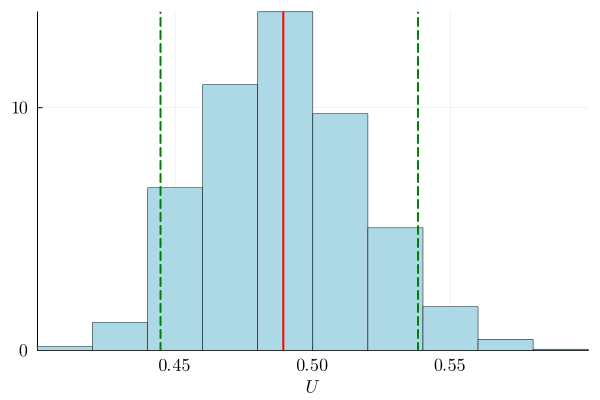

In [12]:
#dataU = Usampled[idxs];
μU = mean(dataU);
ci_low, ci_high = quantile(dataU, [0.05, 0.95])  # 90% CI
b1=histogram(dataU,
    bins = 10,
    normalize = true,
    linewidth = 0.5,
    color = :lightblue,
    xlabel = L"U",
label=false)
b1 = vline!([μU], label = false, color = :red, linewidth = 2)
b1 = vline!([ci_low, ci_high], label = false, color = :green, linestyle = :dash, linewidth = 2)
b1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
b1=plot!(xlims=(0.40,0.60))
b1=plot!(xticks=([0.45,0.5,0.55],[L"0.45", L"0.50",L"0.55"]))
b1=plot!(yticks=([0,10],[L"0", L"10"]))
display(b1)

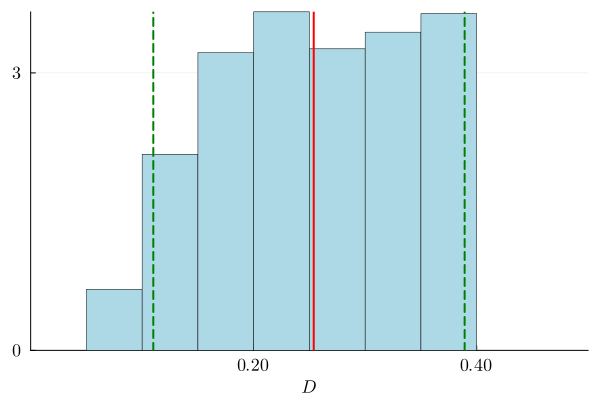

In [13]:
#dataD =  Dsampled[idxs];
μD = mean(dataD);
ci_low, ci_high = quantile(dataD, [0.05, 0.95])  # 90% CI
b2=histogram(dataD,
    bins = 10,
    normalize = true,
    linewidth = 0.5,
    color = :lightblue,
    xlabel = L"D",
label=false)
b2 = vline!([μD], label = false, color = :red, linewidth = 2)
b2 = vline!([ci_low, ci_high], label = false, color = :green, linestyle = :dash, linewidth = 2)
b2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
b2=plot!(xlims=(0.0,0.50))
b2=plot!(xticks=([0.20,0.40],[L"0.20",L"0.40"]))
b2=plot!(yticks=([0,3],[L"0", L"3"]))
display(b2)

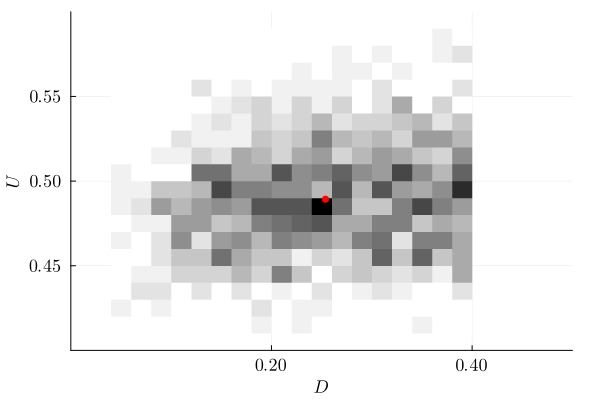

In [14]:
hh = fit(Histogram, (dataD, dataU), nbins=(20,20));
c1 = heatmap(hh.edges[1], hh.edges[2], hh.weights',
             xlabel=L"D", ylabel=L"U",
            colorbar_title="Frequency",colorbar=false,c=reverse(collect(Gray.(LinRange(0, 1, 256)))))
c1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
c1=plot!(xlims=(0.0,0.50),ylims=(0.40,0.60))
c1=plot!(xticks=([0.20,0.40],[L"0.20",L"0.40"]))
c1=plot!(yticks=([0.45,0.50,0.55],[L"0.45", L"0.50",L"0.55"]))
c1=scatter!([μD],[μU],ms=4,mc=:red,msc=:auto,legend=false)

In [15]:
blank =plot([], xlim=(0, 1), ylim=(0, 1),
     xlabel="", ylabel="", title="",
     xticks=false, yticks=false,
     legend=false, grid=false,
     framestyle=:none);

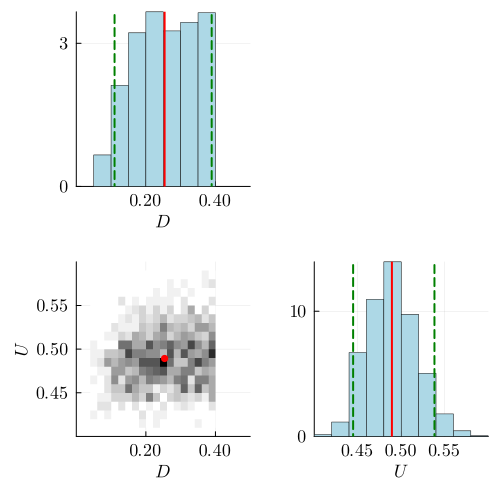

In [16]:
e1=plot(b2,blank,c1,b1,layout=(2,2),size = (500, 500))  #Plot ABC histograms Figure 2(a)

In [45]:
#savefig(e1,"ABC_Rejection_ABM.pdf")

"C:\\Users\\matth\\Dropbox\\RW_Inference_Identifiability_Prediction\\Jupyter\\ABC_Rejection_ABM.pdf"